In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

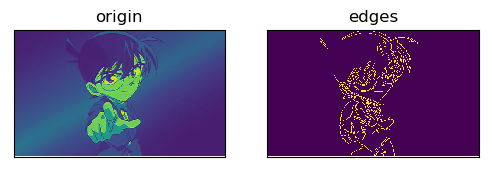

In [20]:
# canny边缘检测   边缘检测易受噪声影响，先用高斯滤波器降噪
img = cv2.imread('kenan.jpg',0)
edges = cv2.Canny(img,80,180,False) # 100,200对应minval,maxval L2gradient默认为false
plt.figure(figsize=(6,2),dpi=100)
plt.subplot(121),plt.imshow(img),plt.title('origin'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(edges),plt.title('edges'),plt.xticks([]),plt.yticks([])
plt.show()

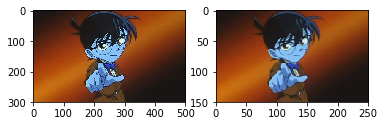

In [23]:
# 图像金字塔
"""
高斯金字塔用来向下降采样图像，而拉普拉斯金字塔则用来从金字塔底层图像中向上采样重建一个图像。

"""
img = cv2.imread('kenan.jpg')
lower_reso = cv2.pyrDown(img)
plt.subplot(121),plt.imshow(img) 
plt.subplot(122),plt.imshow(lower_reso) 
plt.show()

In [2]:
#高斯金字塔  
def pyramid_image(image):  
    level = 3#金字塔的层数  
    temp = image.copy()#拷贝图像  
    pyramid_images = []  
    for i in range(level):  
        dst = cv2.pyrDown(temp)  
        pyramid_images.append(dst)  
        cv2.imshow("高斯金字塔"+str(i), dst)  
        cv2.waitKey(100)
        temp = dst.copy()  
    cv2.destroyAllWindows()
    return pyramid_images  
#拉普拉斯金字塔  
def laplian_image(image):  
    pyramid_images = pyramid_image(image)  
    level = len(pyramid_images)  
    for i in range(level-1, -1, -1):  
        if(i-1) < 0 :  
            expand = cv2.pyrUp(pyramid_images[i], dstsize=image.shape[:2])  
            lpls = cv2.subtract(image, expand)  
            cv2.imshow("拉普拉斯"+str(i), lpls)  
            cv2.waitKey(110)
        else:  
            expand = cv2.pyrUp(pyramid_images[i], dstsize=pyramid_images[i-1].shape[:2])  
            lpls = cv2.subtract(pyramid_images[i-1], expand)  
            cv2.imshow("拉普拉斯"+str(i), lpls)  
            cv2.waitKey(110)
  
src = cv2.imread("b.jpg")  
cv2.imshow("原来", src)  
laplian_image(src)  
cv2.waitKey(0)  
cv2.destroyAllWindows()

error: OpenCV(3.4.1) C:\projects\opencv-python\opencv\modules\imgproc\src\pyramids.cpp:996: error: (-215) std::abs(dsize.width - ssize.width*2) == dsize.width % 2 && std::abs(dsize.height - ssize.height*2) == dsize.height % 2 in function cv::pyrUp_
